# Problem 1 - Phase Plots

## Problem Statement:

You are given the force F as function of position x, acting on a point particle of mass m.

F(x) = −4 e^{−0.2(x−5)} (1 − e^{−0.2(x−5)}), U(5) = 10, m = 1kg

1. You are expected to plot the potential energy U of the particle, as a function of its position x. Note that F(x) = −dU(x)/dx. Take x as np.arange(0, 50, 0.1).
2. If the total energy of the particle is constant and represented by E, from the U(x) vs x curve, identify two different values E1 and E2 (satisfying E1 < E2), such that:
    1. ∀E ∈ (E1, E2) : The phase plot is a closed curve (Well, that seems familiar xD)
    2. ∀E ∈ (E2, ∞) : The phase plot is an open curve (You might wonder why!)
    3. ∀E ∈ (−∞, E1) : The phase plot is not real (What does that even mean? Well, in this region, E represents a classically forbidden value, which makes the kinetic energy K < 0 ∀x ∈ (−∞, ∞))
3. Plot the phase curves for the first two cases, in a single plot, taking any valid value of E in the corresponding ranges. Don’t forget to plot the legend, mentioning the values of E chosen.

## Solution:

### Part 1:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [2]:
def model(U, x):
    dUdx = 4*np.exp(-0.2*(x-5))*(1-np.exp(-0.2*(x-5)))
    return dUdx

U5 = 10.0

x1 = np.arange(5.0, 50.0, 0.02)
x2 = np.arange(5.0, -0.02, -0.02)

U1 = odeint(model, U5, x1)
U2 = odeint(model, U5, x2)

x = np.append(np.flip(x2), x1[1:])
U = np.append(np.flip(U2), U1[1:])

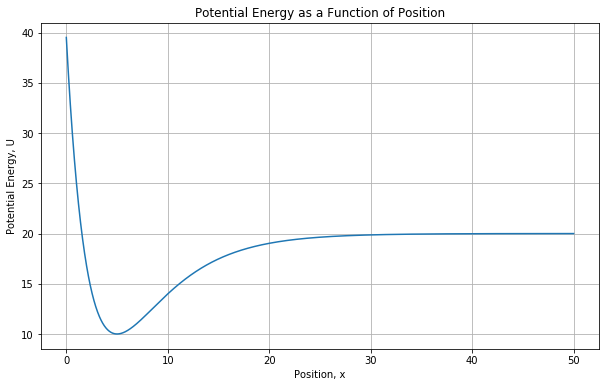

In [3]:
plt.figure(figsize=[10, 6])
plt.plot(x, U)
plt.title('Potential Energy as a Function of Position')
plt.xlabel('Position, x')
plt.ylabel('Potential Energy, U')
plt.grid(True)
plt.show()

### Part 2:

E1 = 10 and E2 = 20 satisfy the given conditions, as is apparent from the graph determined above.

### Part 3:

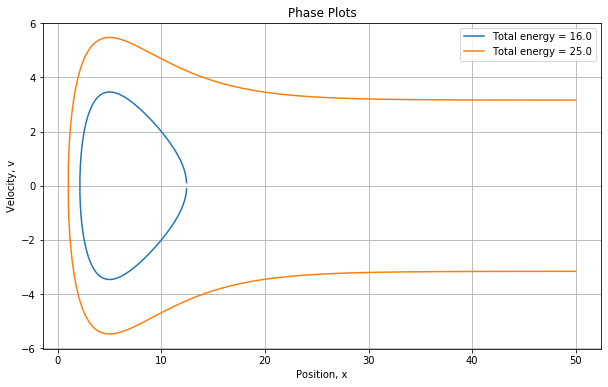

In [4]:
E_A = 16.0
E_B = 25.0
m = 1.0

v_A = np.array([np.sqrt(2*(E_A - Ui)/m) for Ui in U if E_A >= Ui])
v_A = np.append(np.flip(v_A), -v_A)
x_A = np.array([x[i] for i in range(len(x)) if E_A >= U[i]])
x_A = np.append(np.flip(x_A), x_A)

v_B = np.array([np.sqrt(2*(E_B - Ui)/m) for Ui in U if E_B >= Ui])
v_B = np.append(np.flip(v_B), -v_B)
x_B = np.array([x[i] for i in range(len(x)) if E_B >= U[i]])
x_B = np.append(np.flip(x_B), x_B)

plt.figure(figsize=[10, 6])
plt.plot(x_A, v_A, label='Total energy = '+str(E_A))
plt.plot(x_B, v_B, label='Total energy = '+str(E_B))
plt.title('Phase Plots')
plt.xlabel('Position, x')
plt.ylabel('Velocity, v')
plt.grid(True)
plt.legend(loc='best')
plt.show()